In [44]:
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from task1.poly_plot import plot_dsd
from task1.poly_plot import plot_isd

In [45]:
x_i = np.array([4.2, 4.28, 4.36, 4.44, 4.52, 4.6, 4.68, 4.76, 4.84, 4.92, 5])
counts = np.array([2, 6, 10, 14, 16, 8, 6, 4, 2, 1])
n = np.sum(counts)
a = 0.01

h = x_i[1] - x_i[0]

In [46]:
print(f'n = {n}')

n = 69


In [47]:
print(f'h = {h: .3f}')

h =  0.080


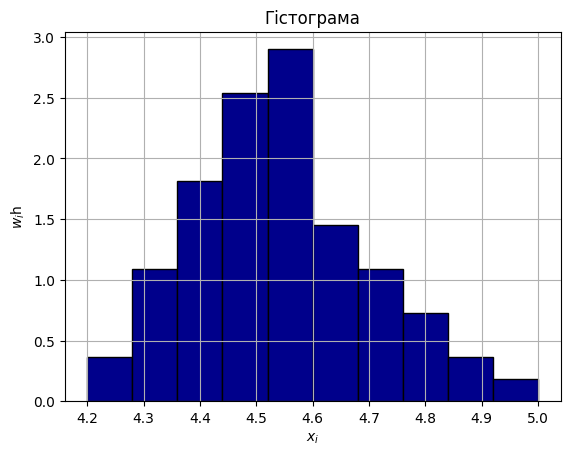

In [48]:
w_div_h = []
for i in counts:
    w_div_h.append(round(i/(n*h), 6))

plot_isd(x_i, w_div_h)

In [49]:
values = []
for i in range(np.size(x_i)-1):
    num = x_i[i]+x_i[i+1]
    num /= 2
    values.append(num)

In [50]:
table = PrettyTable()
table.field_names = ["i", "x_i", "n_i"]
for i in range(np.size(values)):
    table.add_row([i+1, values[i], counts[i]])
print(table)

+----+------+-----+
| i  | x_i  | n_i |
+----+------+-----+
| 1  | 4.24 |  2  |
| 2  | 4.32 |  6  |
| 3  | 4.4  |  10 |
| 4  | 4.48 |  14 |
| 5  | 4.56 |  16 |
| 6  | 4.64 |  8  |
| 7  | 4.72 |  6  |
| 8  | 4.8  |  4  |
| 9  | 4.88 |  2  |
| 10 | 4.96 |  1  |
+----+------+-----+


In [51]:
x_b = round(np.sum(values * counts) / n, 3)
print(f'x_b = {x_b}')

x_b = 4.543


In [52]:
d = round(np.sum(np.power(values, 2) * counts) / np.sum(counts) - np.power(4.54, 2), 3)
print(f"D_b = {d}")

D_b = 0.048


In [53]:
sigma = round(np.sqrt(d), 3)
print(f"sigma = {sigma}")

sigma = 0.219


In [59]:
def calc_z_i(x, x_b, sigma):
    return (x - x_b)/sigma

z = []
for i in range(len(x_i)):
    if i == 0:
        z.append(0)
    elif i == len(x_i)-1:
        z.append(0)
    else:
        num = calc_z_i(x_i[i], x_b, sigma)
        z.append(num)

In [55]:
from scipy.special import erf
Phi = lambda x: erf(x/2**0.5)/2

In [60]:
Phi_z = []
for i in range(len(z)):
    if i == 0:
        Phi_z.append(-0.5)
    elif i == len(z)-1:
        Phi_z.append(0.5)
    else:
        num = Phi(z[i])
        Phi_z.append(num)

In [66]:
P = []
for i in range(len(Phi_z)-1):
    P.append(Phi_z[i+1] - Phi_z[i])

In [67]:
table = PrettyTable()
table.field_names = ["i", "x_i", "x_i+1", "z_i", "z_i+1","Ф(z_i)", "Ф(z_i+1)", "P_i"]

for i in range(len(z)-1):
    
    table.add_row([i+1,
                   x_i[i],
                   x_i[i+1],
                   round(z[i], 4) if i != 0 else "-inf",
                   round(z[i+1], 4) if i+1 != len(z)-1 else "+inf",
                   round(Phi_z[i], 4),
                   round(Phi_z[i+1], 4),
                   round(P[i], 4),])

table.add_row(["-",
               "-",
               "-",
               "-",
               "-",
               "-",
               "Сума",
               round(np.sum(P), 4)
               ])
table

i,x_i,x_i+1,z_i,z_i+1,Ф(z_i),Ф(z_i+1),P_i
1,4.2,4.28,-inf,-1.2009,-0.5,-0.3851,0.1149
2,4.28,4.36,-1.2009,-0.8356,-0.3851,-0.2983,0.0868
3,4.36,4.44,-0.8356,-0.4703,-0.2983,-0.1809,0.1174
4,4.44,4.52,-0.4703,-0.105,-0.1809,-0.0418,0.1391
5,4.52,4.6,-0.105,0.2603,-0.0418,0.1027,0.1445
6,4.6,4.68,0.2603,0.6256,0.1027,0.2342,0.1315
7,4.68,4.76,0.6256,0.9909,0.2342,0.3391,0.1049
8,4.76,4.84,0.9909,1.3562,0.3391,0.4125,0.0734
9,4.84,4.92,1.3562,1.7215,0.4125,0.4574,0.0449
10,4.92,5.0,1.7215,+inf,0.4574,0.5,0.0426


In [79]:
n1 = []
for i in P:
    n1.append(n*i)

sub_n = []
for i in range(len(counts)):
    sub_n.append(counts[i]-n1[i])

sub_n2 = []
for i in sub_n:
    sub_n2.append(np.pow(i, 2))

frac_sub_n2 = []
for i in range(len(sub_n2)):
    frac_sub_n2.append(sub_n2[i] / n1[i])

In [80]:
table = PrettyTable()
table.field_names = ["i", "n_i", "n'_i", "n_i-n'_i", "(n_i-n'_i)^2", "(n_i-n'_i)^2 / n'_i"]

for i in range(len(counts)):
    table.add_row([i+1,
                   counts[i],
                   round(n1[i], 4),
                   round(sub_n[i], 4),
                   round(sub_n2[i], 4),
                   round(frac_sub_n2[i], 4)])

table.add_row(["Сума",
               np.sum(counts),
               np.sum(n1),
               "-",
               "-",
               round(np.sum(frac_sub_n2), 4)
               ])
table

i,n_i,n'_i,n_i-n'_i,(n_i-n'_i)^2,(n_i-n'_i)^2 / n'_i
1,2,7.9276,-5.9276,35.1362,4.4321
2,6,5.9887,0.0113,0.0001,0.0
3,10,8.0991,1.9009,3.6135,0.4462
4,14,9.599,4.401,19.3691,2.0178
5,16,9.9702,6.0298,36.3591,3.6468
6,8,9.0754,-1.0754,1.1565,0.1274
7,6,7.2397,-1.2397,1.5368,0.2123
8,4,5.0613,-1.0613,1.1263,0.2225
9,2,3.1008,-1.1008,1.2119,0.3908
10,1,2.9383,-1.9383,3.7569,1.2786


In [82]:
pearson_observed = np.sum(frac_sub_n2)
print(f"χ^2 спост = {pearson_observed:.4f}")

χ^2 спост = 12.7746


In [83]:
from scipy.stats import chi2

In [87]:
k = len(values) - 2 - 1
print(f'k = {k}')

k = 7


In [90]:
critical_value = chi2.ppf(1 - a, k)
print(f"Критичне значення χ^2 для α = {a} та k = {k}: {critical_value:.4f}")

Критичне значення χ^2 для α = 0.01 та k = 7: 18.4753


In [89]:
if pearson_observed < critical_value:
    print("Оскільки χ^2спост < χ^2кр, гіпотезу про розподіл ознаки генеральної сукупності не відхиляємо")
else:
    print("Оскільки χ^2спост > χ^2кр, гіпотезу про розподіл ознаки генеральної сукупності відхиляємо")

Оскільки χ^2спост < χ^2кр, гіпотезу про розподіл ознаки генеральної сукупності не відхиляємо
